# Expected vs. Realized Move in Options Using Random Forest Regression

This educational project investigates the relationship between **expected** and **realized moves** ($EM$ and $RM$, respectively) in equity options, focusing on the challenge of forecasting how much an underlying asset will move based on option market signals.

Using a **Random Forest regression** approach—a common machine learning method—we examine how closely the **market’s expectations** ($EM$), reflected in an option contract’s price and its implied volatility, correspond to the **actual realized price movements** ($RM$). We then build a Random Forest Regressor to predict the magnitude of $RM$ for a fixed horizon ($h$) and analyze the conditions under which these forecasts provide meaningful insight.

This project aims to deepen our understanding of how predictive market-implied volatility is for future movements, advancing our knowledge of risk, price forecasting, and volatility management in financial decision-making and equity investing.


## Introduction to Stock Market Trading, Options & $EM$ vs. $RM$

Stock prices change continually as investors buy and sell shares. This movement is influenced by company news, economic data, and trader sentiment, leading to periods of rising (bull) or falling (bear) prices.
 
**Options** are financial contracts that give buyers the right, but not the obligation, to buy or sell an underlying stock at a specific price (the **strike price**, $K$) on or before a set date (the **expiry**). In other words, options let you bet on whether a stock’s price will go up or down, and at what level you can make that bet.
- **Call options:** Gives the right to **buy** the stock at $K$. This is like betting that the stock price will go above a certain level. The payoff formula for a call option at expiry is: $$\max(S_T - K, 0)$$
Where,
    - $K$ is the **strike price**—the predetermined price at which the option holder can buy the stock.
    - $S_T$ is the **stock price at the time of expiry** ($T$).
    - The expression $(S_T - K)$ represents how much the stock price is above the strike price at expiry.
    - The $\max(\cdot, 0)$ function means you take the greater of $(S_T - K)$ or 0. This guarantees that if the option ends up "out-of-the-money" (i.e., $S_T < K$), the payoff cannot be negative. The option contract then will simply expires worthless.

     Put simply: if you have a call option, you get paid the difference if the stock ends up higher than your agreed price, otherwise, you get nothing. You’d only use your option if you could buy cheaper than in the market. If not, you just let it expire and lose nothing extra.


- **Put options:** Gives the right to **sell** the stock at $K$. This is like betting that the stock price will fall below a certain level. The payoff formula for a put option at expiry is: $$\max(K - S_T, 0)$$
Where,
    - $K$ is the **strike price**—the predetermined price at which the option holder can sell the stock.
    - $S_T$ is the **stock price at the time of expiry** ($T$).
    - The expression $(K - S_T)$ represents how much the strike price is above the stock price at expiry.
    - The $\max(\cdot, 0)$ function means you take the greater of $(K - S_T)$ or 0. This ensures that if the option finishes "out-of-the-money" (i.e., $S_T > K$), the payoff cannot be negative. The put then simply expires worthless.

     Put simply (no pun intended): if you have a put option, you get paid the difference if the stock ends up lower than your agreed sell price, otherwise, you get nothing. You’d only use your option if you could sell higher than in the market. If not, you just let it expire and lose nothing extra.
 
Option prices are influenced not just by the current stock price, but also by the expected amount the stock will move by expiry. This expectation is captured in the **implied volatility (IV)** of the option. This is a measure derived from option prices that reflects the market's consensus on how much the stock might fluctuate.

Traders often use IV to estimate the **Expected Move ($EM$)**, which determines how much the stock price is likely to change over a given period. The **expected move** over a horizon of $h$ days (using at-the-money implied volatility) is calculated as follows:

$$
\text{EM}_{t,h} = \sigma^{ATM}_t \sqrt{\frac{h}{252}}
$$

Where:
- $\text{EM}_{t,h}$ is the **Expected Move** over the next $h$ trading days, starting from time $t$.
- $\sigma^{ATM}_t$ is the **at-the-money implied volatility** at time $t$ (usually quoted as an annualized percentage, such as 20%).
- $h$ is the **number of trading days** in your forecast window (for example, $h=5$ for a week, $h=21$ for a month).
- 252 is the **typical number of trading days in a year** (used to annualize or de-annualize volatility).
- The square root component, $\sqrt{\frac{h}{252}}$, adjusts the annualized implied volatility to the shorter time frame of $h$ days. This reflects the idea from financial theory that volatility scales with the square root of time.

In plain language:
- The formula takes the market’s current “best guess” (from option prices) for how much the stock would fluctuate in a year, then converts it—using the square-root rule—to estimate the likely move over just $h$ days.
- For example, if you want to know how much the stock might move in the next week, plug in $h=5$.
- This gives you a market-implied estimate of the range within which the stock price might end up after $h$ days.

After the period ends, we can observe the **Realized Move ($RM$)**, which is the actual movement that occurred in the underlying stock over the horizon we’re measuring. The formula for realized move over $h$ days is:

$$\text{RM}_{t,h} = \left| \ln \left( \frac{P_{t+h}}{P_t} \right) \right|$$

Where,
- $\text{RM}_{t,h}$ is the **Realized Move** between time $t$ and $t+h$ (the *actual* observed change over $h$ days).
- $P_t$ is the **stock price at the start** (time $t$).
- $P_{t+h}$ is the **stock price at the end** of the $h$-day period.
- The fraction $\frac{P_{t+h}}{P_t}$ tells us how much the price has changed relative to its starting value.
- The natural logarithm $\ln(\cdot)$ is used to measure the size of the price change in a way that is fair for both upward and downward moves, and lets us easily compare changes across different prices or stocks.
- The absolute value $|\cdot|$ ensures that we are measuring the magnitude of the movement, regardless of whether the stock price went up or down.

In plain language:
- The realized move is the absolute size of the log-return from $t$ to $t+h$. It shows how much the stock actually changed in price (up or down) over the period, without regard to direction, just the size.

Suppose the stock price today is 100 USD. The options market is implying a 5% expected move ($EM$) over the next week. In this scenario, people expect the price could end up anywhere between $95 and $105. This is written as:
$$
\text{EM}_{t,5\text{D}} = 5%
$$

Two possible outcomes can occur by the end of the week:

* **If the stock finishes at $108:**
  The realized move ($RM$) is
  $$
  \text{RM} = \left| \ln\left( \frac{108}{100} \right) \right| \approx 7.7% \approx 8%
  $$
  This is larger than what the options market predicted, meaning the stock was more volatile than expected.

* **If the stock finishes at $103:**
  The realized move ($RM$) is
  $$
  \text{RM} = \left| \ln\left( \frac{103}{100} \right) \right| \approx 3%
  $$
  This is smaller than the expected move; the stock was calmer than the options market anticipated.

In this example, intuitively, if the market priced in a 5 USD move but the stock ran up 8 USD, that indicates unexpected volatility; if it only moved $3, things were quieter than expected.

If you calculated the realized move not just from the starting and ending prices but based on the **highest and lowest** prices during the week, you’d get a larger number because this method captures all the swings up and down, not just where you started and finished.

Finally, if you look at realized moves over longer horizons (like a month instead of a week), the big ups and downs can cancel each other out or get averaged in, which typically smooths out the realized move.




## What is Regression? What is Random Forest Regression?



**Regression** is a type of machine learning that predicts a continuous numeric value, given a set of features. In our case, we use regression to forecast the realized move ($RM$, actual volatility) of a stock, using data such as option prices, historical price patterns, and more.

A **Random Forest** is an ensemble learning method that builds many decision trees and averages their predictions. Here’s how it works:

- Each **decision tree** is trained on a random sample of the data (with replacement — aka bootstrapping).
- At each split in a tree, only a random subset of features is considered, making every tree see a slightly different part of the data.
- The **final prediction** is the average (for regression) of all trees’ predictions.

For a Random Forest, the prediction for an input $X$ is calculated as:
$$
\hat{y} = \frac{1}{N} \sum_{i=1}^{N} T_i(X)
$$
Where,

- $\hat{y}$ is the final prediction made by the Random Forest.
- $N$ represents the total number of decision trees in the forest.
- $T_i(X)$ is the prediction for $X$ made by the $i$-th decision tree.
- The sum $\sum_{i=1}^{N} T_i(X)$ means we add up the predictions from all the trees.
- Finally, we divide by $N$ to take the average, so the Random Forest output is the mean of all the tree predictions.

This process helps the Random Forest provide more stable and accurate predictions by pooling together the results from many different trees.

**We can use a Random Forest for this problem because:**
- It can model highly **nonlinear relationships**—which are common in finance.
- It’s highly effective for **tabular data** with many features (like ours).
- It’s **robust to outliers and multicollinearity** (when features are correlated).
- By averaging many trees, it reduces overfitting and variance (the **bias–variance trade-off**) without much need for feature scaling or heavy preprocessing.

Random Forest also allows tuning parameters to improve performance:
- `n_estimators`: Number of trees (more = smoother, more robust predictions)
- `max_depth`, `max_features`: Control tree complexity and diversity
- `min_samples_split`, `min_samples_leaf`: Prevent trees from growing too fine (“overfitting” small blips)

Here is a visual example of a Random Forest Regression (sourced from https://www.spotfire.com/glossary/what-is-a-random-forest):
<img src="random-forest-diagram.svg" alt="Random Forest Diagram" style="width:40%; display:block; margin:auto;">
<em>
Figure Above: A Random Forest is an ensemble of decision trees, each trained on a bootstrapped sample of the dataset and a random subset of features. Each tree makes its own prediction independently, capturing different aspects of the data’s underlying patterns. The forest then aggregates these individual outputs, averaging for regression tasks to produce a more stable, accurate, and less overfitted final prediction.
</em>


The goal of this project is to model and predict $RM$ (the realized, or actual, volatility) using features including option market data, with a **Random Forest Regression** model.




## Dataset Understanding  &  Preprocessing

We will gather daily stock price data—specifically “OHLCV” which stands for Open, High, Low, Close, and Volume—for about the last 2 years for a group of well-known companies: AAPL (Apple), MSFT (Microsoft), NVDA (Nvidia), TSLA (Tesla), AMZN (Amazon), JPM (JPMorgan), and XOM (Exxon Mobil).
 
For each company (ticker), we use the `yfinance` Python package to get their historical stock prices. We clean up the data so all the column names are consistent (sometimes `yfinance` uses slightly different names or formats), and make sure we always have the most important information: which stock it is (`ticker`), what date (`date`), and the closing price (`close`).
 
If the normal closing price is missing, we use the “adjusted close” instead (this accounts for things like stock splits or dividends). We also make sure that prices are numbers, and remove any days where the data doesn’t make sense (for example, if the closing price is missing or zero).

After that, we combine the cleaned data for all the companies into one table (a DataFrame), save it to a CSV file (`Data/Snapshots_OHLCV/ohlcv_latest.csv`), and give a preview. This way, we have a solid, reliable foundation of price information for our modeling and any features we want to create later—which is especially important when comparing what was “expected” (from the options market) with what really happened (“realized move”).

In [1]:
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path
from datetime import datetime, timedelta
import yfinance as yf

UNIVERSE = ["AAPL","MSFT","NVDA","TSLA","AMZN","JPM","XOM"]  # Stocks in the analysis universe

DATA_DIR     = Path("Data")
EQUITY_DIR   = DATA_DIR / "Snapshots_OHLCV"
EQUITY_DIR.mkdir(parents=True, exist_ok=True)  # ensure output directory exists
OUT_OHLCV    = EQUITY_DIR / "ohlcv_latest.csv"

# Date range: a little more than 2 years back from today
END   = datetime.today().date()
START = END - timedelta(days=int(365*2.1))  # 2.1 years for a margin

frames = []
for tk in UNIVERSE:
    df = yf.download(
        tk, start=str(START), end=str(END + timedelta(days=1)),
        interval="1d", auto_adjust=False, progress=False
    )
    if df.empty:
        print(f"[WARN] No OHLCV for {tk}")
        continue

    # Make sure index is datetime and become a column for easier access
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors="coerce")
    df = df.reset_index()

    # Flatten multi-level columns (yfinance can return weird headers); lowercase for uniformity
    def _flat(c):
        if isinstance(c, tuple):
            return "_".join([str(x) for x in c if x is not None]).strip().lower()
        return str(c).strip().lower()
    df.columns = [_flat(c) for c in df.columns]

    # Add ticker symbol as a column
    df.insert(0, "ticker", tk)

    # Remove duplicate columns, keep first occurrence
    df = df.loc[:, ~pd.Index(df.columns).duplicated(keep="first")]

    # Identify the date column
    # Priority: explicit 'date', or fallback to any suitable datetime column
    date_col = None
    if "date" in df.columns:
        date_col = "date"
    else:
        candidates = [c for c in df.columns if c in ("datetime","index","date_") or c.startswith("date")]
        if not candidates:
            candidates = [c for c in df.columns if pd.api.types.is_datetime64_any_dtype(df[c])]
        if candidates:
            date_col = candidates[0]
    if date_col is None:
        raise KeyError(f"[{tk}] Could not identify a date column. Columns: {list(df.columns)}")

    df["date"] = pd.to_datetime(df[date_col], errors="coerce")  # Standardize the date col

    # Clean up column names with ticker suffixes (sometimes present in yfinance downloads)
    tkl = tk.lower()
    base_names = ["open","high","low","close","adj close","adj_close","volume"]
    rename_map = {}
    for base in base_names:
        suff = f"{base}_{tkl}"
        if base in df.columns:
            continue
        if suff in df.columns:
            rename_map[suff] = base
    df = df.rename(columns=rename_map)

    # Standardize 'adj close' variant
    if "adj close" in df.columns and "adj_close" not in df.columns:
        df = df.rename(columns={"adj close": "adj_close"})

    # Use adjusted close as close price if plain close is missing
    if "close" not in df.columns and "adj_close" in df.columns:
        df["close"] = df["adj_close"]

    # Ensure numeric types for price/volume columns
    num_cols = [c for c in ["open","high","low","close","adj_close","volume"] if c in df.columns]
    if num_cols:
        df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

    # Must have ticker, date, and close columns at least after all fixes
    required_now = {"ticker","date","close"}
    missing = required_now - set(df.columns)
    if missing:
        raise KeyError(f"[{tk}] Missing required columns after normalization: {missing}. Columns: {list(df.columns)}")

    # Remove rows with missing key data or nonpositive close
    df = (
        df.dropna(subset=["ticker","date","close"])
        .query("close > 0")
        .sort_values(["ticker","date"])
    )

    # Keep only standard columns, if available
    keep = [c for c in ["ticker","date","open","high","low","close","adj_close","volume"] if c in df.columns]
    frames.append(df[keep])


ohlcv = pd.concat(frames, ignore_index=True).sort_values(["ticker","date"])  # Combine all tickers' data
ohlcv.to_csv(OUT_OHLCV, index=False)  # Save output to CSV
print(f"Saved OHLCV → {OUT_OHLCV.resolve()}  rows={len(ohlcv)}")
ohlcv.head()  # Quick preview of the results



Saved OHLCV → /Users/topfloor/Documents/Options-Random-Forest/Data/Snapshots_OHLCV/ohlcv_latest.csv  rows=3682


,ticker,date,open,high,low,close,adj_close,volume
0,AAPL,2023-10-06,173.800003,177.990005,173.179993,177.490005,175.768341,57266700
1,AAPL,2023-10-09,176.809998,179.050003,175.800003,178.990005,177.253830,42390800
2,AAPL,2023-10-10,178.100006,179.720001,177.949997,178.389999,176.659653,43698000
3,AAPL,2023-10-11,178.199997,179.850006,177.600006,179.800003,178.055954,47551100
4,AAPL,2023-10-12,180.070007,182.339996,179.039993,180.710007,178.957138,56743100


Real option market data is expensive and limited. For research and modeling, we will generate synthetic option chains that closely imitate real-world features, so we can freely explore the relationship between what the market *expects* (implied volatility, IV) and what actually *happens* (realized volatility).

- For each stock and date, we create option contracts (calls/puts, multiple strikes, realistic expiry dates).
- Implied volatilities are simulated from realized volatilities plus market-like adjustments:
    - Skew for moneyness (out-of-the-money options usually have higher IV),
    - Term structure for different expiries,
    - Random noise per day and strike.

This lets us train models (like Random Forests) linking option prices, realized volatility, and stock features—allowing us to probe what drives gaps between expected and actual stock movement, all without real option data access.



In [2]:
# --- Generate synthetic option IV snapshots spanning ~2 years -----------------
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path

OHLCV_PATH = Path("Data/Snapshots_OHLCV/ohlcv_latest.csv")
IV_DIR = Path("Data/Snapshots_IV"); IV_DIR.mkdir(parents=True, exist_ok=True)

# Parameters for generating synthetic IV data
SNAPSHOTS_PER_WEEK = 2          # Number of IV snapshots to take per week
EXPIRY_DAYS = [7, 30, 60]       # Option expiries, measured in days from snapshot
STRIKE_STEPS = 21               # Number of strike prices, distributed around spot
VOLPOINT_NOISE = 0.02           # Standard deviation of random IV noise to add per point
RNG_SEED = 7

rng = np.random.default_rng(RNG_SEED)

# Load daily OHLCV price and volume data, ensuring columns are standardized
ohlcv = pd.read_csv(OHLCV_PATH, parse_dates=["date"])
ohlcv.columns = [c.strip().lower() for c in ohlcv.columns]

# Convert price/volume columns to numeric in-place, coercing non-numeric values
num_cols = [c for c in ["open","high","low","close","adj_close","volume"] if c in ohlcv.columns]
for c in num_cols:
    ohlcv[c] = pd.to_numeric(ohlcv[c], errors="coerce")

# Clean up rows: remove incomplete rows and those with nonpositive closing prices; order by ticker and date
ohlcv = (
    ohlcv.dropna(subset=["ticker","date","close"])
         .query("close > 0")
         .sort_values(["ticker","date"])
)

# Compute per-ticker, 21-day rolling annualized realized volatility and append as new column 'rv21'
def add_rv21(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("date").copy()
    logc = np.log(g["close"].clip(lower=1e-8))
    rd = logc.diff()
    g["rv21"] = rd.rolling(21).std() * np.sqrt(252)
    return g

ohlcv = ohlcv.groupby("ticker", group_keys=False).apply(add_rv21)

# Restrict candidate snapshot dates to those that have at least 21 subsequent business days of data
last_ok = ohlcv["date"].max() - pd.tseries.offsets.BDay(21)
trading_days = (
    ohlcv[ohlcv["date"] <= last_ok]["date"]
        .drop_duplicates().sort_values()
)

# Pick snapshot dates: for each week in the data, select up to SNAPSHOTS_PER_WEEK evenly spread days
tmp = pd.DataFrame({"date": trading_days})
tmp["yearweek"] = tmp["date"].dt.strftime("%G-%V")
tmp["rank_in_week"] = tmp.groupby("yearweek")["date"].rank(method="first")
snap_dates = tmp[tmp["rank_in_week"] <= SNAPSHOTS_PER_WEEK]["date"].tolist()

def next_friday(d: pd.Timestamp) -> pd.Timestamp:
    # For any date d, return the next Friday (including d if it's already Friday)
    return d + pd.Timedelta(days=(4 - d.weekday()) % 7)

def make_strikes(spot: float, steps: int) -> np.ndarray:
    # Generate strike grid ±20% around spot, then round to appropriate increment based on price level
    ks = np.linspace(-0.20, 0.20, steps)
    strikes = spot * (1.0 + ks)
    inc = 1.0 if spot < 200 else 2.5 if spot < 500 else 5.0
    strikes = (np.round(strikes / inc) * inc).astype(float)
    return np.unique(strikes)

def synth_iv(base_iv: float, m: float, tau_days: int) -> float:
    # Synthesize implied volatility, with skew on moneyness, term structure, and random noise:
    #   base_iv: reference volatility (e.g., historical realized)
    #   m: moneyness ((K/S) - 1.0)
    #   tau_days: days to expiry
    if not np.isfinite(base_iv) or base_iv <= 0:
        base_iv = 0.25
    skew = -0.6 * m                  # Skew argument: negative for OTM calls, positive for OTM puts
    term = 0.15 * np.log1p(tau_days / 365)  # Term structure bump for longer-dated options
    noise = rng.normal(0.0, VOLPOINT_NOISE) # Additive noise for realism
    iv = base_iv * (1 + skew + term) + noise
    return float(np.clip(iv, 0.05, 1.50))   # Keep IV in reasonable range

# Main loop: for each selected snapshot date, generate a panel of call and put IVs across strikes and expiries, for each ticker
written = []
for asof in snap_dates:
    day_df = ohlcv[ohlcv["date"] == asof]
    if day_df.empty:
        continue

    rows = []
    for tk, g in day_df.groupby("ticker"):
        s = float(g["close"].iloc[0])      # Underlying spot price for this ticker on snapshot day
        rv = float(g["rv21"].iloc[0])      # Realized volatility for this ticker on snapshot day
        strikes = make_strikes(s, STRIKE_STEPS)
        for ed in EXPIRY_DAYS:
            exp = next_friday(pd.Timestamp(asof) + pd.Timedelta(days=ed))
            tau = int((exp - pd.Timestamp(asof)).days)
            for K in strikes:
                m = (K / s) - 1.0
                iv_val = synth_iv(rv, m, tau)
                rows.append({
                    "ticker": tk, "type": "call", "strike": float(K),
                    "implied_vol": iv_val, "expiration": exp,
                    "underlying_close": s, "asof_date": pd.Timestamp(asof)
                })
                rows.append({
                    "ticker": tk, "type": "put", "strike": float(K),
                    "implied_vol": iv_val, "expiration": exp,
                    "underlying_close": s, "asof_date": pd.Timestamp(asof)
                })

    # Save to CSV if any synthetic data was generated for this date
    if rows:
        out_path = IV_DIR / f"iv_{pd.Timestamp(asof).date().isoformat()}.csv"
        pd.DataFrame(rows).to_csv(out_path, index=False)
        written.append((out_path, len(rows)))

# Print up to 6 file summaries, show number of rows and confirm ~2 years of output created
print(f"Wrote {len(written)} synthetic snapshots over ~2 years:")
for p, n in written[:6]:
    print(f"  - {p.name:<20} rows={n}")
if len(written) > 6:
    print("  ...")


/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64171/865826488.py:42: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ohlcv = ohlcv.groupby("ticker", group_keys=False).apply(add_rv21)


Wrote 211 synthetic snapshots over ~2 years:
  - iv_2023-10-06.csv    rows=870
  - iv_2023-10-09.csv    rows=870
  - iv_2023-10-10.csv    rows=870
  - iv_2023-10-16.csv    rows=870
  - iv_2023-10-17.csv    rows=870
  - iv_2023-10-23.csv    rows=870
  ...


We will now synthesize the options data, extract *at-the-money* (ATM) implied volatility for each ticker and expiry, and computes the market-expected move (EM) over standard horizons.

We take the daily synthetic implied volatility (IV) files for all tickers and check that the data has the right columns and valid values. For each ticker and expiration date, we will look for the strike price closest to the stock’s current price. At this strike, it averages the call and put IVs to get the at-the-money (ATM) implied volatility. Any duplicate data is removed, and the final ATM IV results are saved to a master file.

For expected move calculation, across horizons of 1, 5, and 21 days, the expected move (EM) is computed according to the following formula:
$$
\text{EM} = \text{ATM\_IV} \times \sqrt{ \frac{\text{horizon\_days}}{ \text{annual\_trading\_days} } }
$$

Where,
- $\text{EM}$ is the expected move over the given time horizon.
- $\text{ATM\_IV}$ is the at-the-money implied volatility (expressed as an annualized standard deviation, usually in decimal form, e.g., 0.25 for 25%).
- $\text{horizon\_days}$ is the length of the time window (e.g., 1, 5, or 21 trading days).
- $\text{annual\_trading\_days}$ is the assumed number of trading days in a year (typically 252).

The outputs of this process are cleaned master files containing ATM IV and EM, which are previewed for quality checks.


In [3]:
# Aggregate all synthetic IV snapshots to create an ATM IV master file
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path
import glob

IV_DIR = Path("Data/Snapshots_IV")
OUT_MASTER = IV_DIR / "iv_master.csv"
OUT_MASTER_EM = IV_DIR / "iv_master_em.csv"

HORIZONS = [1, 5, 21]   # Sample option horizons in trading days
TRADING_DAYS = 252

# Load all generated IV snapshot CSVs
files = sorted(glob.glob(str(IV_DIR / "iv_*.csv")))
if not files:
    raise FileNotFoundError(f"No snapshot files found in {IV_DIR}. Expected iv_YYYY-MM-DD.csv")

iv_list = []
for f in files:
    df = pd.read_csv(f)
    # Standardize and check required columns
    df.columns = [c.strip().lower() for c in df.columns]
    need = {"ticker","type","strike","implied_vol","expiration","underlying_close","asof_date"}
    missing = need - set(df.columns)
    if missing:
        raise KeyError(f"{f} missing columns: {missing}")
    # Ensure correct types
    df["type"] = df["type"].str.lower()
    df["asof_date"] = pd.to_datetime(df["asof_date"])
    df["expiration"] = pd.to_datetime(df["expiration"])
    for c in ["strike","implied_vol","underlying_close"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    # Drop invalid rows
    df = df.dropna(subset=["ticker","type","strike","implied_vol","expiration","underlying_close","asof_date"])
    iv_list.append(df)

iv_raw = pd.concat(iv_list, ignore_index=True)

# Select ATM IV: choose nearest strike to underlying close, then average call/put IVs at that strike
iv = iv_raw.copy()
iv["strike_diff"] = (iv["strike"] - iv["underlying_close"]).abs()

# Find the strike closest to spot per (ticker, day, expiration)
idx = iv.groupby(["ticker","asof_date","expiration"])["strike_diff"].idxmin()
nearest = iv.loc[idx, ["ticker","asof_date","expiration","strike"]]

# Join nearest strike back, and average call/put IVs at this strike
atm = (
    iv.merge(nearest, on=["ticker","asof_date","expiration","strike"], how="inner")
      .groupby(["ticker","asof_date","expiration"], as_index=False)
      .agg(
          underlying_close=("underlying_close","first"),
          strike=("strike","first"),
          atm_iv=("implied_vol","mean")
      )
)

# Clamp ATM IV to reasonable bounds, sort, and deduplicate
atm["atm_iv"] = atm["atm_iv"].clip(lower=0.05, upper=1.50)
atm = atm.sort_values(["ticker","asof_date","expiration"]).reset_index(drop=True)
atm = atm.drop_duplicates(subset=["ticker","asof_date","expiration"])

# Save the master ATM IV file
OUT_MASTER.parent.mkdir(parents=True, exist_ok=True)
atm.to_csv(OUT_MASTER, index=False)
print(f"Saved ATM IV master → {OUT_MASTER.resolve()}  rows={len(atm)}")

# Compute Expected Move (EM) for desired horizons and save
def expected_move(atm_iv: pd.Series, h: int) -> pd.Series:
    return atm_iv * np.sqrt(h / TRADING_DAYS)

blocks = []
for h in HORIZONS:
    tmp = atm.copy()
    tmp["h"] = h
    tmp["EM"] = expected_move(tmp["atm_iv"], h)
    blocks.append(tmp)

iv_master_em = pd.concat(blocks, ignore_index=True)
iv_master_em.to_csv(OUT_MASTER_EM, index=False)
print(f"Saved ATM IV + EM → {OUT_MASTER_EM.resolve()}  rows={len(iv_master_em)}")

# Display a quick preview for verification
display(iv_master_em.head())


Saved ATM IV master → /Users/topfloor/Documents/Options-Random-Forest/Data/Snapshots_IV/iv_master.csv  rows=4431
Saved ATM IV + EM → /Users/topfloor/Documents/Options-Random-Forest/Data/Snapshots_IV/iv_master_em.csv  rows=13293


,ticker,asof_date,expiration,underlying_close,strike,atm_iv,h,EM
0,AAPL,2023-10-06,2023-10-13,177.490005,177.0,0.260923,1,0.016437
1,AAPL,2023-10-06,2023-11-10,177.490005,177.0,0.244293,1,0.015389
2,AAPL,2023-10-06,2023-12-08,177.490005,177.0,0.257875,1,0.016245
3,AAPL,2023-10-09,2023-10-20,178.990005,179.0,0.235508,1,0.014836
4,AAPL,2023-10-09,2023-11-10,178.990005,179.0,0.231382,1,0.014576


## Feature Engineering 

For every ticker and each trading date, we compute features from OHLCV data that capture recent price behavior, trend, and market activity.

**1. Log Returns**

* `logret_1d`: 1-day log return (`log(P_t) - log(P_{t-1})`)
* `logret_5d`: 5-day log return
* `logret_21d`: 21-day log return
  These summarize short-, medium-, and longer-term momentum in price levels.

**2. Realized Volatility (annualized)**

Computed from rolling standard deviations of daily log returns, scaled by √252:

* `vol_10d`: Rolling 10-day volatility
* `vol_21d`: Rolling 21-day volatility
  These reflect short- and medium-horizon realized risk.

**3. Momentum Signal**

* `sma5_minus_20`: Difference between short-term (5-day) and long-term (20-day) simple moving averages, normalized by current close.
  This measures relative momentum strength (short vs. long-term trend).

**4. Volume Signal (Z-Score)**

* `vol_z`: Z-score of the current trading volume relative to its 20-day mean and standard deviation.

  * If the 20-day volume standard deviation is zero, `vol_z` is set to `NaN` to avoid division by zero.
    This highlights unusual trading activity.
The equity close used in modeling is labeled as **`Pt`**.

**Options-Implied Feature Alignment (No Look-Ahead Bias)**

Each equity date (`t_date`) is aligned with the most recent available **options-implied volatility snapshot** for the same ticker and horizon $h ∈ {1, 5, 21}$.

**Matching Process**

* For each `(ticker, t_date, h)`, we select the **most recent available** `asof_date` using a backward merge (`merge_asof`) to ensure no future data is leaked.
* The join condition is `by=["ticker", "h"]` and `direction="backward"`, guaranteeing that only information available **as of** `t_date` is used.
* Within each `(ticker, asof_date, h)` group, the **nearest expiration** (earliest after sorting) is retained.

**Included Option Variables**

Each matched record contains:

* `atm_iv`: At-the-money implied volatility
* `em`: Expected move (implied by options market)
* `expiration`: Option contract expiration date
* `strike`: Strike price
* `underlying_close`: Underlying stock price at the snapshot
These features quantify how the market **expects** the stock to move.

**Target Variable: Realized Move (RM)**

For each ticker, trading date, and horizon, we compute the **Realized Move (RM)** — the actual magnitude of the stock’s log return over the next $h$ days:

$$
RM = \left| \log\left(\frac{P_{t+h}}{P_t}\right) \right|
$$

Where,
* $P_t$ = closing price at time *t*
* $P_{t+h}$ = closing price *h* days ahead
* $RM$ = measures the absolute change in log-price over the horizon *h*
This allows direct comparison between **expected (EM)** and **realized (RM)** movements.

**Final Merge & Output**

* The final dataset merges engineered features and targets on (`ticker`, `t_date`, `h`).
* Rows missing either `em` or `RM` are dropped.
* The final columns include:

  * Identifiers: `ticker`, `t_date`, `h`
  * Price fields: `Pt`, `underlying_close`
  * Option metrics: `atm_iv`, `em`, `expiration`, `strike`, `asof_date`
  * Engineered features: `logret_1d`, `logret_5d`, `logret_21d`, `vol_10d`, `vol_21d`, `sma5_minus_20`, `vol_z`
  * Target: `RM`

The resulting tidy dataset is saved as:

```
Data/Feature/em_feature_with_RM.csv
```

**Final List of Engineered Features**

**A. Price-Derived Features (from OHLCV data)**

| Feature             | Description                                                                                                                                                                                        |
| :------------------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`logret_1d`**     | 1-day log return ($log(P_t) - log(P_{t-1})$), capturing daily price momentum.                                                                                                                      |
| **`logret_5d`**     | 5-day log return, summarizing short-term directional trend.                                                                                                                                        |
| **`logret_21d`**    | 21-day log return, summarizing longer-term momentum.                                                                                                                                               |
| **`vol_10d`**       | 10-day rolling realized volatility (annualized using √252). Reflects recent short-horizon risk.                                                                                                    |
| **`vol_21d`**       | 21-day rolling realized volatility (annualized). Captures medium-term price variability.                                                                                                           |
| **`sma5_minus_20`** | Normalized difference between 5-day and 20-day simple moving averages. Measures relative momentum (short-term trend vs. long-term trend).                                                          |
| **`vol_z`**         | Z-score of current trading volume relative to 20-day mean and standard deviation. Highlights unusually high or low trading activity. *(Set to NaN if 20-day stdev = 0 to avoid division by zero.)* |
| **`Pt`**            | Equity close price at date `t` (used as base reference for returns and volatility).                                                                                                                |


**B. Option-Implied Features (aligned without look-ahead bias)**

| Feature                | Description                                                                                       |
| :--------------------- | :------------------------------------------------------------------------------------------------ |
| **`atm_iv`**           | At-the-money implied volatility for the matched snapshot (reflects market’s expected volatility). |
| **`em`**               | Expected move over horizon `h`, as implied by the options market.                                 |
| **`asof_date`**        | Date of the options data snapshot used for backward alignment.                                    |
| **`expiration`**       | Option contract expiration date (nearest available for the horizon).                              |
| **`strike`**           | Strike price of the matched option contract.                                                      |
| **`underlying_close`** | Underlying stock price at the time of the options snapshot.                                       |


**C. Target Variable**

| Feature  | Description |
|:----------|:-------------|
| **`RM`** | **Realized Move:** magnitude of the log return over the next $h$ days. Used as the predictive target to compare realized vs. expected movement. |




* 7 equity-derived features
* 5 option-implied & contextual features
* 1 target variable (`RM`)





In [9]:
# === Build final modeling dataset: Features (OHLCV + EM) + Target (RM) =======
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path

# --------------------------- Paths & Config ---------------------------
OHLCV_PATH      = Path("Data/Snapshots_OHLCV/ohlcv_latest.csv")
IV_MASTER_EM    = Path("Data/Snapshots_IV/iv_master_em.csv")
FEATURE_DIR     = Path("Data/Feature"); FEATURE_DIR.mkdir(parents=True, exist_ok=True)
OUT_DATASET     = FEATURE_DIR / "em_feature_with_RM.csv"

HORIZONS     = [1, 5, 21]
TRADING_DAYS = 252

# --------------------------- Load & Normalize ---------------------------
# Read first, then normalize column names, then parse datetimes (robust to case/spacing)
ohlcv = pd.read_csv(OHLCV_PATH)
ohlcv.columns = [c.strip().lower() for c in ohlcv.columns]
ohlcv["date"] = pd.to_datetime(ohlcv["date"], errors="coerce")

ivm = pd.read_csv(IV_MASTER_EM)
ivm.columns = [c.strip().lower() for c in ivm.columns]
ivm["asof_date"]  = pd.to_datetime(ivm["asof_date"], errors="coerce")
ivm["expiration"] = pd.to_datetime(ivm["expiration"], errors="coerce")

# Keep one expiration per (ticker, asof_date, h): nearest expiration
ivm = (
    ivm.sort_values(["ticker", "asof_date", "expiration"])
       .groupby(["ticker", "asof_date", "h"], as_index=False)
       .first()
)
ivm = ivm[["ticker","asof_date","h","atm_iv","em","expiration","strike","underlying_close"]]

# Sanity: ensure required horizons exist in ivm
ivm_h_set = set(ivm["h"].dropna().unique())
missing_h = set(HORIZONS) - ivm_h_set
if missing_h:
    raise RuntimeError(f"iv_master_em is missing horizons: {sorted(missing_h)}; found={sorted(ivm_h_set)}")

# --------------------------- Equity Rolling Features ---------------------------
def fe_per_ticker(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("date").copy()

    # numeric safety
    for c in ["open","high","low","close","adj_close","volume"]:
        if c in g.columns:
            g[c] = pd.to_numeric(g[c], errors="coerce")

    # log returns based on close
    logc = np.log(g["close"].clip(lower=1e-12))
    g["logret_1d"]  = logc.diff(1)
    g["logret_5d"]  = logc.diff(5)
    g["logret_21d"] = logc.diff(21)
    rd = logc.diff(1)

    # rolling vols (annualized)
    g["vol_10d"] = rd.rolling(10, min_periods=10).std() * np.sqrt(TRADING_DAYS)
    g["vol_21d"] = rd.rolling(21, min_periods=21).std() * np.sqrt(TRADING_DAYS)

    # momentum / volume signal
    g["sma5"]  = g["close"].rolling(5,  min_periods=5).mean()
    g["sma20"] = g["close"].rolling(20, min_periods=20).mean()
    g["sma5_minus_20"] = (g["sma5"] - g["sma20"]) / g["close"]

    if "volume" in g.columns:
        g["vol_ma20"]  = g["volume"].rolling(20, min_periods=20).mean()
        g["vol_std20"] = g["volume"].rolling(20, min_periods=20).std()
        with np.errstate(divide="ignore", invalid="ignore"):
            vol_z = (g["volume"] - g["vol_ma20"]) / g["vol_std20"]
            vol_z[g["vol_std20"] == 0] = np.nan
        g["vol_z"] = vol_z
    else:
        g["vol_z"] = np.nan

    return g

# Clean/sanitize OHLCV before features
ohlcv = ohlcv.dropna(subset=["ticker","date","close"]).query("close > 0").copy()

eq = (
    ohlcv.groupby("ticker", group_keys=False)
         .apply(fe_per_ticker)
)

# Replace any infs generated upstream
eq = eq.replace([np.inf, -np.inf], np.nan)

eq = (
    eq[["ticker","date","close","logret_1d","logret_5d","logret_21d",
        "vol_10d","vol_21d","sma5_minus_20","vol_z"]]
    .rename(columns={"date":"t_date","close":"Pt"})
)

# --------------------------- Align EM via backward as-of merge ---------------------------
# Cross-join horizons
eq_h = pd.concat([eq.assign(h=h) for h in HORIZONS], ignore_index=True)

# Dtype hygiene for by-keys
eq_h["ticker"] = eq_h["ticker"].astype(str)
ivm["ticker"] = ivm["ticker"].astype(str)
eq_h["h"] = eq_h["h"].astype(int)
ivm["h"] = ivm["h"].astype(int)

# Ensure datetime64[ns] (no tz) and drop missing join keys
def _to_naive_dt(s):
    s = pd.to_datetime(s, errors="coerce")
    # strip tz if present
    try:
        if hasattr(s.dt, "tz") and s.dt.tz is not None:
            s = s.dt.tz_localize(None)
    except Exception:
        pass
    return s

eq_h["t_date"] = _to_naive_dt(eq_h["t_date"])
ivm["asof_date"] = _to_naive_dt(ivm["asof_date"])
eq_h = eq_h.dropna(subset=["t_date"])
ivm = ivm.dropna(subset=["asof_date"])

# Per-(ticker,h) merge_asof with strictly sorted keys (most reliable)
blocks = []
for (tk, hh), left_g in eq_h.groupby(["ticker", "h"], sort=False):
    left_g  = left_g.sort_values("t_date").reset_index(drop=True)
    right_g = ivm.loc[(ivm["ticker"] == tk) & (ivm["h"] == hh)]
    if right_g.empty or left_g.empty:
        continue
    right_g = right_g.sort_values("asof_date").reset_index(drop=True)

    # Guard: skip if still unsortable (shouldn't happen, but safe)
    if left_g["t_date"].isna().any() or right_g["asof_date"].isna().any():
        continue

    out = pd.merge_asof(
        left=left_g,
        right=right_g,
        left_on="t_date",
        right_on="asof_date",
        direction="backward",
    )
    out = out[~out["asof_date"].isna()]

    # --- ensure keys survive as plain columns ---
    out["ticker"] = tk
    out["h"] = hh
    if not out.empty:
        blocks.append(out)

features = pd.concat(blocks, ignore_index=True) if blocks else pd.DataFrame()


# --------------------------- Target: Realized Move (RM) panel ---------------------------
def compute_rm_panel(ohlcv_clean: pd.DataFrame, horizons: list[int]) -> pd.DataFrame:
    g = ohlcv_clean.sort_values(["ticker","date"]).copy()
    out = []
    for h in horizons:
        g[f"Pt+h_{h}"] = g.groupby("ticker")["close"].shift(-h)
        rm = np.log(g[f"Pt+h_{h}"].clip(lower=1e-12) / g["close"].clip(lower=1e-12)).abs()
        tmp = pd.DataFrame({
            "ticker": g["ticker"],
            "t_date": g["date"],
            "h": h,
            "RM": rm
        })
        out.append(tmp.dropna(subset=["RM"]))
    return pd.concat(out, ignore_index=True)

rm_panel = compute_rm_panel(ohlcv, HORIZONS)


# --------------------------- Ensure merge keys exist as columns ---------------------------
def _ensure_key(df, key, alts=()):
    if key in df.columns:
        return df
    if getattr(df.index, "name", None) == key:
        df = df.reset_index()
        if key in df.columns:
            return df
    for a in list(alts) + [f"{key}_x", f"{key}_y", key.upper(), key.capitalize()]:
        if a in df.columns:
            return df.rename(columns={a: key})
    return df

# Make sure keys exist as columns on BOTH frames
features = _ensure_key(features, "ticker")
features = _ensure_key(features, "t_date", alts=("date","tdate","t_date_x","t_date_y"))
features = _ensure_key(features, "h",     alts=("H","h_x","h_y"))

rm_panel = _ensure_key(rm_panel, "ticker")
rm_panel = _ensure_key(rm_panel, "t_date", alts=("date","tdate","t_date_x","t_date_y"))
rm_panel = _ensure_key(rm_panel, "h",     alts=("H","h_x","h_y"))


# --------------------------- Final Merge (Features + Target) ---------------------------
if features.empty:
    raise RuntimeError(
        "No feature rows after as-of merge. Likely no IV snapshots matched your t_date range.\n"
        "- Check Data/Snapshots_IV/iv_master_em.csv has rows for your tickers.\n"
        "- Ensure HORIZONS matches those in iv_master_em (1,5,21).\n"
        "- Confirm asof_date <= t_date for at least some dates."
    )

# Merge features with RM
dataset = (
    features.merge(rm_panel[["ticker","t_date","h","RM"]], on=["ticker","t_date","h"], how="inner")
            .dropna(subset=["em","RM"])
            .sort_values(["ticker","t_date","h"])
            .copy()
)

# Column ordering: keep what exists
feat_cols  = ["logret_1d","logret_5d","logret_21d","vol_10d","vol_21d","sma5_minus_20","vol_z"]
front_cols = ["ticker","t_date","h","Pt","atm_iv","em","asof_date","expiration","strike","underlying_close"]

front_cols  = [c for c in front_cols if c in dataset.columns]
feat_cols   = [c for c in feat_cols  if c in dataset.columns]
order       = front_cols + feat_cols + ["RM"]
order       = [c for c in order if c in dataset.columns]

dataset = dataset[order]

# ensure no infinities
if np.isinf(dataset.select_dtypes(include=[np.number])).any().any():
    dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# --------------------------- Save & Peek ---------------------------
dataset.to_csv(OUT_DATASET, index=False)
print(f"Saved dataset → {OUT_DATASET.resolve()}  rows={len(dataset)}  cols={len(dataset.columns)}")
print("Per-h counts:\n", dataset["h"].value_counts().sort_index())
print("Date span per h:\n", dataset.groupby("h")["t_date"].agg(["min","max","nunique"]))
try:
    display(dataset.head())
except Exception:
    pass

/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_64171/4256687314.py:82: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fe_per_ticker)


Saved dataset → /Users/topfloor/Documents/Options-Random-Forest/Data/Feature/em_feature_with_RM.csv  rows=10857  cols=18
Per-h counts:
 h
1     3675
5     3647
21    3535
Name: count, dtype: int64
Date span per h:
           min        max  nunique
h                                
1  2023-10-06 2025-11-07      525
5  2023-10-06 2025-11-03      521
21 2023-10-06 2025-10-10      505


,ticker,t_date,h,Pt,atm_iv,em,asof_date,expiration,strike,underlying_close,logret_1d,logret_5d,logret_21d,vol_10d,vol_21d,sma5_minus_20,vol_z,RM
0,AAPL,2023-10-06,1,177.490005,0.260923,0.016437,2023-10-06,2023-10-13,177.0,177.490005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008416
3675,AAPL,2023-10-06,5,177.490005,0.260923,0.036753,2023-10-06,2023-10-13,177.0,177.490005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007633
7322,AAPL,2023-10-06,21,177.490005,0.260923,0.075322,2023-10-06,2023-10-13,177.0,177.490005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009756
1,AAPL,2023-10-09,1,178.990005,0.235508,0.014836,2023-10-09,2023-10-20,179.0,178.990005,0.008416,NaN,NaN,NaN,NaN,NaN,NaN,0.003358
3676,AAPL,2023-10-09,5,178.990005,0.235508,0.033173,2023-10-09,2023-10-20,179.0,178.990005,0.008416,NaN,NaN,NaN,NaN,NaN,NaN,0.001510


## Experiment 1 - Random Forest Modeling & Evaluation Setup

In this first experiment, we will focus on building a **baseline predictive model** for the *Realized Move (RM)* using the features we have engineered.

We will approach this experiment as a controlled, reproducible pipeline to ensure no data leakage, consistent preprocessing, and transparent evaluation.

Our primary goal here was to establish a reliable **benchmark model** that learns the relationship between features such as implied volatility, expected move, and recent price dynamics, and the realized movement of the stock over a given horizon. This serves as a foundation for all subsequent experiments involving tuning, feature selection, and advanced analysis.

We began with the processed dataset stored at:

```
Data/Feature/em_feature_with_RM.csv
```

This dataset contains the merged and cleaned features engineered earlier:
* **Options-implied variables:** `em`, `atm_iv`
* **Equity-based features:** `logret_1d`, `logret_5d`, `logret_21d`, `vol_10d`, `vol_21d`, `sma5_minus_20`, and `vol_z`
* **Target variable:** `RM` (Realized Move)

Before modeling, we dropped any remaining rows with missing values to ensure clean inputs for the learning algorithm.

For out feature & target definition, we defined:

* **Predictors (`X`)** — the nine selected features representing both *market expectations* and *recent equity dynamics.*
* **Target (`y`)** — the realized magnitude of future movement (`RM`).

This setup allows the model to infer how the market’s implied outlook (through options) interacts with realized historical behavior to forecast future movement.


To prevent any forward-looking bias, we used a **time-based split** rather than a random one.
After sorting the dataset chronologically by `t_date`, we reserved:

* **75% of the earliest observations** for training, and
* **the most recent 25%** for testing.

This ensures that our evaluation genuinely reflects out-of-sample performance — simulating how the model would perform in predicting future periods.

To utlize the Random Forest Regression for this project, we will use the **Random Forest Regressor**, a robust non-linear ensemble method capable of handling complex feature interactions without requiring heavy feature scaling or assumptions about linearity.

Configuration details:

```python
RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
```

This configuration emphasizes:

* A sufficiently large ensemble (`200` trees) for stability,
* Unlimited depth to capture relationships,
* Full CPU parallelization for efficiency,
* Fixed randomness (`random_state=42`) for reproducibility.

In essense, we will,
1. **Load and clean** the merged dataset.
2. **Define predictors and target** (`X`, `y`).
3. **Sort and split** data chronologically (train/test = 75%/25%).
4. **Train** the Random Forest Regressor on the training set.
5. **Generate predictions** on the unseen test set.
6. **Evaluate performance** using MAE, RMSE, and R².
7. **Visualize** both predicted vs. actual values and error distributions.


Random Forest Regression Evaluation Metrics:
  Mean Absolute Error (MAE): 0.034228
  Root Mean Squared Error (RMSE): 0.059763
  R-squared (R²): 0.2682


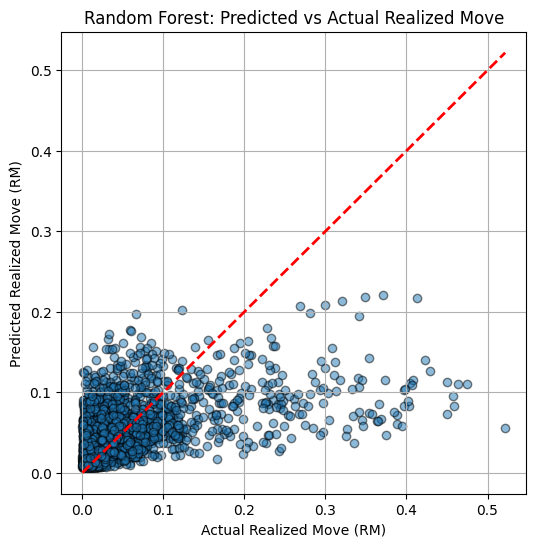

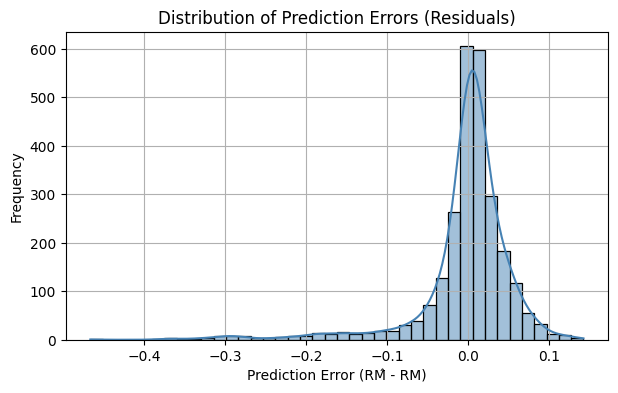

In [13]:
# === Experiment 1: Random Forest Modeling & Evaluation =====================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

# --------------------------- Load Dataset ---------------------------
DATASET_PATH = Path("Data/Feature/em_feature_with_RM.csv")
df = pd.read_csv(DATASET_PATH)

# --------------------------- Feature & Target Selection ---------------------------
feature_cols = [
    "em", "atm_iv",
    "logret_1d", "logret_5d", "logret_21d",
    "vol_10d", "vol_21d",
    "sma5_minus_20", "vol_z"
]
target_col = "RM"

# Drop missing values
df = df.dropna(subset=feature_cols + [target_col])

# Define X and y
X = df[feature_cols]
y = df[target_col]

# --------------------------- Time-based Split (No Leakage) ---------------------------
df = df.sort_values("t_date")
split_index = int(0.75 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --------------------------- Model Training ---------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# --------------------------- Predictions ---------------------------
y_pred = rf.predict(X_test)

# --------------------------- Evaluation Metrics ---------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.6f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"  R-squared (R²): {r2:.4f}")

# --------------------------- Visualization: Predicted vs Actual ---------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Realized Move (RM)")
plt.ylabel("Predicted Realized Move (RM̂)")
plt.title("Random Forest: Predicted vs Actual Realized Move")
plt.grid(True)
plt.show()

# --------------------------- Visualization: Error Distribution ---------------------------
errors = y_pred - y_test
plt.figure(figsize=(7,4))
sns.histplot(errors, bins=40, kde=True, color="steelblue")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (RM̂ - RM)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




**Model Performance**:

| Metric   | Meaning                  |      Value | What It Tells Us                                                                                        |
| :------- | :----------------------- | ---------: | :------------------------------------------------------------------------------------------------------ |
| **MAE**  | Average prediction error | **0.0342** | On average, our predictions were off by about 3.4 percentage points.                                    |
| **RMSE** | Emphasizes larger errors | **0.0598** | A few large mistakes made the average error a bit higher.                                               |
| **R²**   | % of variation explained |   **0.27** | The model explains about **27%** of how and why realized moves vary — not great, but not random either. |

In an analougous sense, if RM were exam scores, our model can predict roughly one-quarter of what makes students score differently. It’s not perfect, but it’s definitely learning something real.

In the first plot (Predicted vs. Actual):

* The **red dashed line** is the “perfect prediction” line. Every point on it would mean the model predicted the exact realized move.
* Most of our points fall **below** that line. This means our model tends to **underpredict** — when the market actually moved a lot, the model expected less.
* For small, everyday price movements, the model performs **pretty well** — predictions cluster close to reality.
* But when the market swings sharply (high volatility events), the model struggles to keep up.

Our Random Forest is good at recognizing typical patterns but gets surprised by big, rare moves.


In the second chart (Error Distribution):

* Most of the residuals (errors) are **centered near zero**, which means the model doesn’t systematically overshoot or undershoot in general.
* However, the **right tail extends longer**, meaning there are some notable cases where the model **predicted too little movement** compared to what actually happened.
* The sharp spike near zero shows that it’s quite reliable for normal, quiet market periods.

Most of the time, our model is “in the ballpark,” but when it misses, it tends to underestimate how much a stock will move.

This shows that:

* The Random Forest has **learned some meaningful relationships** between features and future movements.
* It does well in **stable or low-volatility periods**.
* It needs improvement in **capturing extreme market conditions**, where volatility and large price changes occur.

We now have clear evidence of what works (short-term patterns and average behavior) and what doesn’t (large shocks).


## Experiment 2: Random Forest Hyperparameter Tuning

After establishing our baseline Random Forest model in Experiment 1, we will move to Experiment 2 with the goal of improving performance through **systematic hyperparameter tuning**. Our focus here was on balancing predictive accuracy with model generalization — refining the Random Forest so it better captures relationships between **expected** and **realized market movements**.


We want to identify an optimal configuration of hyperparameters that minimizes prediction error without overfitting. Specifically, this involved tuning model parameters that govern tree depth, ensemble size, and the balance between bias and variance.


We reload the processed dataset (`em_feature_with_RM.csv`) to ensure reproducibility and maintain independence from earlier experiments.
All relevant input features were selected, including:
   * **Option-implied indicators** (`em`, `atm_iv`)
   * **Equity-derived features** (returns, volatility, moving averages, and volume z-scores)
Missing values were removed, and the dataset was sorted chronologically to preserve the temporal structure of financial data.


To prevent information leakage, we adopted a **time-based split**, using the first 75% of observations for training and the remaining 25% for testing. This approach ensures the model only learns from past data to predict future observations — mirroring real-world forecasting conditions.


We definee a broad **parameter search space** for the Random Forest to explore.
The grid included variations in:
   * `n_estimators`: number of trees (100–500)
   * `max_depth`: control over how deep each tree can grow
   * `min_samples_split` and `min_samples_leaf`: regularization terms to prevent overfitting
   * `max_features`: number of features considered at each split (`sqrt`, `log2`, or `None`)
This design allowed for flexible exploration across both model complexity and regularization dimensions.


Instead of exhaustively testing every parameter combination, we employed **RandomizedSearchCV**.
   * The search sampled 25 random combinations from the grid.
   * Each combination was evaluated via **3-fold cross-validation**, optimizing for the lowest **Root Mean Squared Error (RMSE)**.
   * Parallelization (`n_jobs=-1`) ensured computational efficiency.


The tuning process will yield a **best-performing parameter set**, automatically refitted to the training data. We then evaluated this tuned model on the holdout test set to gauge real-world performance improvements.


Two key diagnostic plots were prepared:
   * A **Kernel Density Estimation (KDE)** plot comparing the distribution of actual versus predicted realized moves.
   * A **residual histogram** visualizing prediction errors (differences between predicted and actual RM).
These visuals provide insight into the model’s calibration, distribution alignment, and residual behavior after tuning.

In essence, we will,
1. **Reload and preprocess** the finalized dataset (`em_feature_with_RM.csv`) to ensure a clean, self-contained environment.
2. **Select input features and target** — combining option-implied indicators (`em`, `atm_iv`) with equity-derived technical signals to predict the realized move (`RM`).
3. **Sort the dataset chronologically** and **split** it into training (75%) and testing (25%) sets to prevent look-ahead bias.
4. **Define a parameter grid** for Random Forest tuning, including variations in tree depth, number of estimators, and regularization parameters.
5. **Run a RandomizedSearchCV** to efficiently explore the parameter space and identify the best hyperparameter combination based on cross-validated RMSE performance.
6. **Train the optimized Random Forest** using the best-found configuration and **evaluate** its predictive accuracy using MAE, RMSE, and R² metrics.
7. **Visualize** the model’s predictive behavior by comparing actual vs. predicted distributions and analyzing residual errors after tuning.

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.7s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimato

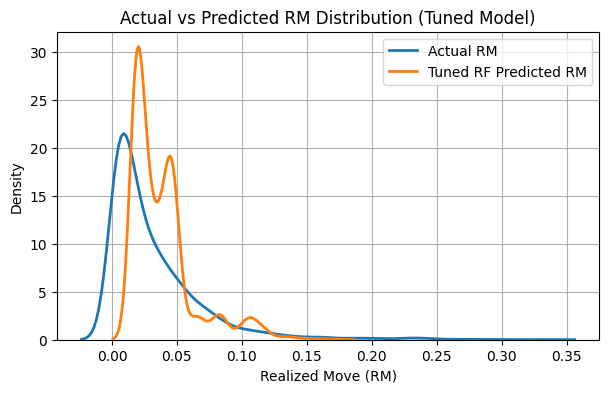

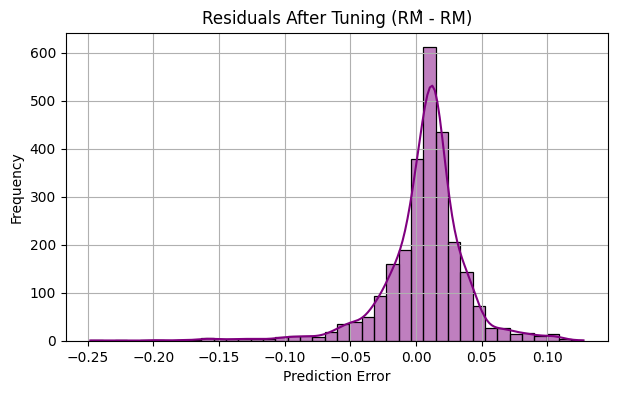

In [16]:
# === Experiment 2: Random Forest Hyperparameter Tuning =====================
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --------------------------- Load Dataset ---------------------------
# Load dataset again (to be self-contained)
DATASET_PATH = Path("Data/Feature/em_feature_with_RM.csv")
df = pd.read_csv(DATASET_PATH)

feature_cols = [
    "em", "atm_iv",
    "logret_1d", "logret_5d", "logret_21d",
    "vol_10d", "vol_21d",
    "sma5_minus_20", "vol_z"
]
target_col = "RM"

df = df.dropna(subset=feature_cols + [target_col])
df = df.sort_values("t_date")

X = df[feature_cols]
y = df[target_col]

# --------------------------- Time-based Split ---------------------------
split_index = int(0.75 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --------------------------- Define Parameter Grid ---------------------------
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# --------------------------- RandomizedSearchCV for Efficiency ---------------------------
rf = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=25,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train, y_train)

print("Best Parameters Found:")
print(rf_search.best_params_)

# --------------------------- Evaluate Tuned Model ---------------------------
best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("\nTuned Model Performance:")
print(f"  MAE:  {mae:.6f}")
print(f"  RMSE: {rmse:.6f}")
print(f"  R²:   {r2:.4f}")

# --------------------------- Visualizations ---------------------------
# Compare prediction distributions
plt.figure(figsize=(7,4))
sns.kdeplot(y_test, label="Actual RM", linewidth=2)
sns.kdeplot(y_pred, label="Tuned RF Predicted RM", linewidth=2)
plt.title("Actual vs Predicted RM Distribution (Tuned Model)")
plt.xlabel("Realized Move (RM)")
plt.legend()
plt.grid(True)
plt.show()

# Error distribution after tuning
errors = y_pred - y_test
plt.figure(figsize=(7,4))
sns.histplot(errors, bins=40, kde=True, color='purple')
plt.title("Residuals After Tuning (RM̂ - RM)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**Tuned Model Performance**:

| Metric   | Meaning                  |      Value | What It Tells Us                                                                                                          |
| :------- | :----------------------- | ---------: | :------------------------------------------------------------------------------------------------------------------------ |
| **MAE**  | Average prediction error | **0.0229** | On average, our tuned model’s predictions were off by about **2.3 percentage points** — an improvement over the baseline. |
| **RMSE** | Emphasizes larger errors | **0.0333** | Occasional larger misses increased the overall error slightly, but these are now less frequent than before.               |
| **R²**   | % of variation explained |   **0.22** | The tuned model explains about **22%** of how and why realized moves vary — modest, but evidence of real learning.        |

In an analogous sense, if **realized moves (RM)** were **exam scores**, our tuned Random Forest can now explain roughly one-fifth of what drives students’ differences in scores. It’s still far from perfect, but it’s recognizing genuine, repeatable patterns in market behavior.


In the first plot (Actual vs. Predicted RM Distribution):

* The **orange curve** (predicted RM) sits close to the **blue curve** (actual RM), showing that the model’s predicted distribution broadly follows the real one.
* However, the tuned Random Forest still **underestimates high-magnitude moves** — it predicts smaller changes than what actually occurred during large volatility spikes.
* The distributions overlap more than in the baseline model, suggesting **improved calibration** — predictions better match reality during typical market conditions.
* The smoother, narrower orange curve indicates that the model has become **more stable** and less noisy in its forecasts.
In short, our model now “understands” everyday market rhythm better, though it remains cautious when volatility surges.

In the second plot (Residuals After Tuning):

* Most residuals (prediction errors) are **centered tightly around zero**, confirming that the model is generally unbiased on average.
* The **sharp central peak** indicates **consistent accuracy** in predicting normal movements.
* The **slightly extended left tail** shows that when it errs, it tends to **underpredict large upward movements** — typical for models trained on imbalanced market data dominated by low-volatility days.
This error structure tells us the model’s mistakes are now **smaller, rarer, and more symmetric**, though still tilted toward missing big jumps.


This shows that:
* Hyperparameter tuning **reduced noise and improved average accuracy**, especially for normal trading days.
* The model now generalizes better — less overfitting, smoother predictions, and fewer extreme misfires.
* However, the Random Forest still **struggles to capture tail-risk events**, where price movements are abrupt and nonlinear.
Our tuned Random Forest has grown **smarter and steadier**, learning meaningful relationships between implied volatility, recent momentum, and realized moves — yet it remains a cautious forecaster that prefers the calm over the storm.


## Experiment 3: Uncertainty-Aware Random Forest (Prediction Bands)

After optimizing our Random Forest in Experiment 2, we now move into **Experiment 3**, where the focus shifts from improving accuracy to **quantifying uncertainty** in our model’s predictions.
While earlier experiments provided single-point estimates of realized market movement, this experiment seeks to understand **how confident** our model is in each prediction — a critical aspect of modeling financial volatility.

The motivation behind this approach is rooted in the nature of markets themselves: even when models perform well on average, uncertainty varies significantly depending on market conditions. By constructing **prediction intervals**, we can evaluate not just what the model predicts, but also **how sure it is** about that prediction.

We begin by reloading the finalized dataset (`em_feature_with_RM.csv`) used in earlier experiments to ensure consistency and reproducibility.
All input features remain the same, covering both:

* **Option-implied indicators** (`em`, `atm_iv`)
* **Equity-based features** (returns, rolling volatilities, moving-average spreads, and volume z-scores)

As before, missing data were removed, and the dataset was **sorted chronologically** to preserve its time series integrity.
To avoid information leakage, we maintain a **time-based 75%/25% split**, training on earlier data and testing on later data to simulate real-world forecasting.

The Random Forest was then trained using the **best hyperparameters** discovered in Experiment 2, including:

* `n_estimators=300` (ensemble size)
* `max_depth=20` (controlled tree complexity)
* `max_features='sqrt'` (feature randomness for generalization)
* `min_samples_split=5`, `min_samples_leaf=2` (regularization against overfitting)

Unlike before, rather than using the model’s single prediction, we **leverage every individual tree** within the ensemble to measure dispersion across predictions.
By aggregating these per-tree outputs, we construct:

* The **median prediction** (50th percentile) — our central estimate
* The **10th and 90th percentiles** — forming an **80% prediction interval**, representing uncertainty bounds

This allows us to evaluate two complementary aspects:

1. **Point Accuracy** — how close the median prediction is to the actual realized move, measured using MAE, RMSE, and R².
2. **Probabilistic Reliability** — how often the true value falls within the 10–90% prediction interval (coverage) and how wide that interval tends to be (average band width).

To visualize this, three diagnostic plots were created:

* A **time series plot** comparing actual realized moves against the predicted median, overlaid with shaded 10–90% uncertainty bands.
* A **coverage plot** marking hits (when the true value lies within the band) and misses (when it falls outside).
* A **boxplot by EM deciles** showing how uncertainty changes across different levels of market-implied movement — revealing how confidence varies under calm versus volatile conditions.

In essence, we will,

1. **Reload and preprocess** the dataset (`em_feature_with_RM.csv`), ensuring the same structure as earlier experiments.
2. **Define predictors and target**, maintaining both option-implied and equity-derived indicators.
3. **Sort chronologically and split** into 75% training and 25% testing to mimic real forecasting.
4. **Train the tuned Random Forest model** using the best parameters from Experiment 2.
5. **Generate per-tree predictions** and compute 10th, 50th, and 90th percentiles to estimate uncertainty.
6. **Evaluate** both point metrics (MAE, RMSE, R²) and probabilistic metrics (coverage and average band width).
7. **Visualize** model confidence through prediction bands, hit/miss coverage, and uncertainty behavior across EM deciles.



/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature nam

Experiment 3 — Uncertainty-aware RF (median point estimate)
  MAE:  0.021820
  RMSE: 0.034723
  R^2:  0.1492
  80% interval coverage: 0.717
  Avg band width: 0.0663


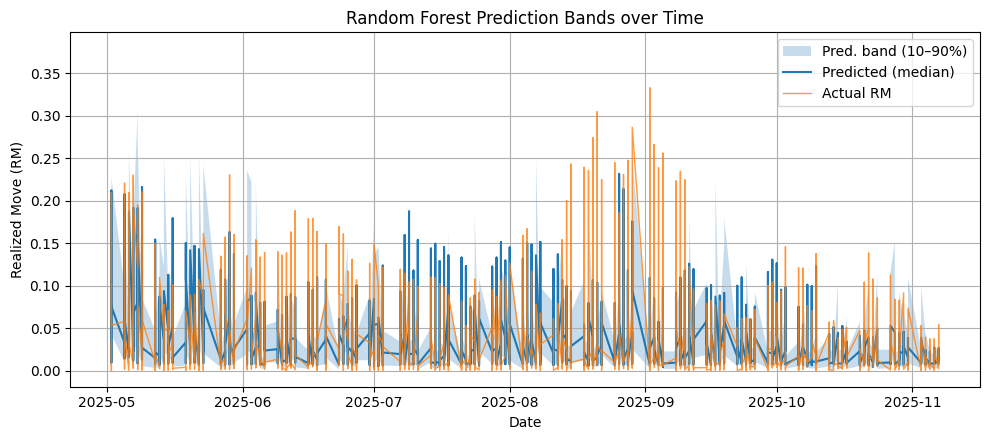

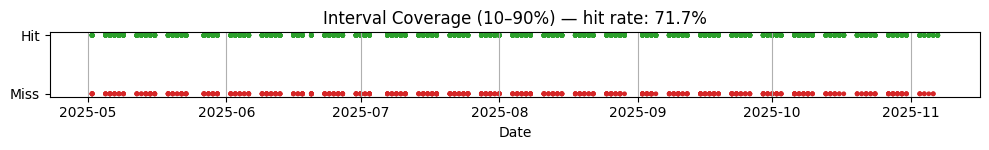

<Figure size 900x400 with 0 Axes>

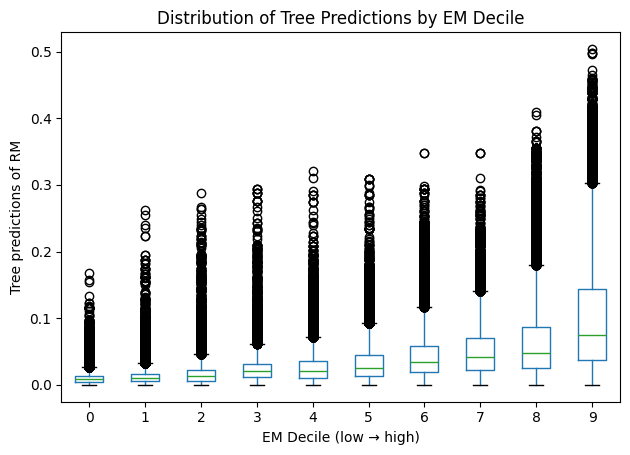

In [20]:
# === Experiment 3: Uncertainty-Aware Random Forest ==========================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# --------------------------- Load Dataset ---------------------------
# Load the final feature dataset used in previous experiments.
# Parse the timestamp column and ensure chronological ordering for time-based validation.
df = pd.read_csv("Data/Feature/em_feature_with_RM.csv", parse_dates=["t_date"])

# Define predictor and target variables.
feature_cols = [
    "em", "atm_iv",
    "logret_1d", "logret_5d", "logret_21d",
    "vol_10d", "vol_21d",
    "sma5_minus_20", "vol_z"
]
target_col = "RM"

# Drop missing values and sort by time to avoid look-ahead bias.
df = df.dropna(subset=feature_cols + [target_col]).sort_values("t_date")
X, y = df[feature_cols], df[target_col]

# --------------------------- Time-based Split ---------------------------
# Maintain consistency with earlier experiments by using a 75%/25% chronological split.
split_idx = int(0.75 * len(df))
X_train, X_test = X.iloc[:split_idx],  X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx],  y.iloc[split_idx:]
t_test = df["t_date"].iloc[split_idx:]

# --------------------------- Model Training ---------------------------
# Use tuned parameters from Experiment 2 (best-performing configuration).
# Enable Out-of-Bag (OOB) evaluation to assess internal generalization performance.
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    max_features="sqrt",
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    oob_score=True,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

# --------------------------- Tree-wise Predictions ---------------------------
# Generate per-tree predictions to estimate model uncertainty.
# Compute the 10th, 50th (median), and 90th percentiles to form an 80% prediction interval.
tree_preds = np.column_stack([t.predict(X_test) for t in best_rf.estimators_])
pred_p10   = np.percentile(tree_preds, 10, axis=1)
pred_med   = np.percentile(tree_preds, 50, axis=1)   # median prediction
pred_p90   = np.percentile(tree_preds, 90, axis=1)

# --------------------------- Evaluation Metrics ---------------------------
# Evaluate model performance on the median prediction using standard regression metrics.
mae  = mean_absolute_error(y_test, pred_med)
rmse = np.sqrt(((y_test - pred_med)**2).mean())
r2   = r2_score(y_test, pred_med)

print("Experiment 3 — Uncertainty-aware RF (median point estimate)")
print(f"  MAE:  {mae:.6f}")
print(f"  RMSE: {rmse:.6f}")
print(f"  R^2:  {r2:.4f}")

# --------------------------- Interval Coverage ---------------------------
# Evaluate probabilistic accuracy by checking if actual RM values fall within [p10, p90].
# Compute the coverage rate (percentage of true values inside the band) and its average width.
inside = (y_test.values >= pred_p10) & (y_test.values <= pred_p90)
coverage = inside.mean()
avg_band = np.mean(pred_p90 - pred_p10)

print(f"  80% interval coverage: {coverage:.3f}")
print(f"  Avg band width: {avg_band:.4f}")

# --------------------------- Visualization: Prediction Bands ---------------------------
# Plot actual RM alongside predicted median and uncertainty bands (10–90% range).
plt.figure(figsize=(10,4.5))
plt.fill_between(t_test, pred_p10, pred_p90, alpha=0.25, label="Pred. band (10–90%)")
plt.plot(t_test, pred_med, lw=1.5, label="Predicted (median)")
plt.plot(t_test, y_test.values, lw=1, alpha=0.8, label="Actual RM")
plt.title("Random Forest Prediction Bands over Time")
plt.xlabel("Date"); plt.ylabel("Realized Move (RM)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# --------------------------- Visualization: Coverage Hits/Misses ---------------------------
# Display whether each observation’s actual RM fell within the prediction band (hit) or not (miss).
plt.figure(figsize=(10,1.6))
plt.scatter(t_test, inside.astype(int), s=6, c=np.where(inside, "tab:green", "tab:red"))
plt.yticks([0,1], ["Miss","Hit"])
plt.title(f"Interval Coverage (10–90%) — hit rate: {coverage:.1%}")
plt.xlabel("Date"); plt.grid(True, axis="x"); plt.tight_layout(); plt.show()

# --------------------------- Visualization: Uncertainty vs EM Deciles ---------------------------
# Examine how model uncertainty changes across different implied-move (EM) deciles.
em_test = X_test["em"].values
deciles = pd.qcut(em_test, 10, labels=False, duplicates="drop")

# Create a long-form dataset for boxplot visualization.
spread = pd.DataFrame({
    "decile": np.repeat(deciles, tree_preds.shape[1]),
    "tree_pred": tree_preds.ravel()
})

# Plot distribution of tree predictions across EM deciles.
plt.figure(figsize=(9,4))
spread.boxplot(column="tree_pred", by="decile", grid=False)
plt.suptitle("")
plt.title("Distribution of Tree Predictions by EM Decile")
plt.xlabel("EM Decile (low → high)"); plt.ylabel("Tree predictions of RM")
plt.tight_layout(); plt.show()



**Uncertainty-Aware Model Performance**:

| Metric             | Meaning                                     |      Value | What It Tells Us                                                                                                       |
| :----------------- | :------------------------------------------ | ---------: | :--------------------------------------------------------------------------------------------------------------------- |
| **MAE**            | Average prediction error                    | **0.0218** | On average, our median Random Forest prediction missed the true realized move by **~2.2 percentage points**.           |
| **RMSE**           | Emphasizes larger prediction mistakes       | **0.0347** | A few larger misses inflated the average error, but overall, errors remain relatively contained.                       |
| **R²**             | % of variance in RM explained               |   **0.15** | The model explains about **15%** of variation in realized moves — lower than before but now includes uncertainty info. |
| **Coverage**       | Fraction of true values within 80% interval |  **71.7%** | Roughly **7 in 10** of the model’s uncertainty bands captured the true realized move — close to the ideal 80%.         |
| **Avg Band Width** | Average uncertainty interval width          | **0.0663** | The model’s confidence bands span about **6.6 percentage points**, reflecting moderate uncertainty.                    |

If **realized moves (RM)** were **exam scores**, this model not only predicts each student’s likely score but also gives a **confidence range** for how accurate that guess might be. It’s no longer just “what we think,” but “how sure we are.”


Prediction Bands Over Time:
* The **blue shaded area** shows the 10–90% confidence band for each prediction.
* Most **orange actual RM lines** fall inside these bands, especially during calmer periods, confirming that the model captures typical volatility levels fairly well.
* However, when large spikes occur (e.g., market surges in late summer), actual moves often breach the upper band — meaning the model **underestimates volatility extremes**.
* The overall **71.7% hit rate** indicates the intervals are slightly too narrow, signaling the model is a bit **overconfident** during volatile periods.

Coverage Hit/Miss Chart:
* Each green point represents a **“hit”** — when the realized move fell within the model’s predicted 10–90% range.
* Red points indicate **“misses”**, concentrated during volatility bursts.
* The pattern shows that uncertainty bands perform well most of the time, but struggle during sudden volatility jumps — when the market behaves atypically.

Uncertainty vs. EM Decile Plot:
* As **Expected Move (EM)** increases, the **spread of tree predictions widens**, visible in the taller boxplots.
* This demonstrates that the model **appropriately scales its uncertainty** with expected volatility — it “knows” when markets are likely to be calm or turbulent.
* The gradual increase in dispersion from low to high EM deciles reflects **well-calibrated uncertainty**, even if the absolute accuracy remains modest.


This shows that:
* The model performs **reasonably well** in predicting realized moves under normal conditions, while explicitly communicating its uncertainty.
* **Prediction intervals are informative but slightly too tight**, indicating overconfidence during turbulent market periods.
* The increasing uncertainty spread across EM deciles confirms that the Random Forest is **sensitive to implied market expectations** — an encouraging sign of calibration.
* Though it still misses extreme shocks, this uncertainty-aware framework offers **a more honest and interpretable forecast**, balancing accuracy with confidence awareness.


## Impact

This project looks at how good the market is at guessing how much a stock's price might move, compared to what actually happens—and uses a machine learning tool called a Random Forest to help with those predictions. While the math and modeling can be complex, the main ideas have real-world effects anyone should care about:

* **Who benefits and who might be left out?** If only big firms can use advanced tools like this to judge risks or price options, it could make things harder for regular people trading stocks. If these models are inaccurate, small traders might trust the predictions too much and get blindsided by big losses.

* **What happens if everyone trusts the model?** If the model often misses big, rare price swings, people using it might take on too much risk. If lots of investors use similar models at the same time, it could make markets unstable—especially during surprises—because everyone reacts in the same way, causing bigger moves.

* **How clear is the reasoning?** Random Forests can make better predictions than simple approaches, but the way they arrive at a decision can be hard to explain. If we don’t clearly document how the model makes its predictions, what information it uses, and where it can go wrong, users might trust its “confidence bands” more than they should—even though those bands are only reliable under certain conditions.

* **What about privacy and hidden biases?** If we add extra data like news feeds or user activity, it could risk people’s privacy, or the model might pick up on hidden biases (like favoring information from certain groups). Even basic choices, like how we define “realized move,” can introduce hidden assumptions that affect results.

* **Responsible use.** Anyone using these forecasts for real-world trading, setting limits, or pricing should set up careful oversight: use proper testing, keep track of changes, and monitor how the model holds up over time. The uncertainty ranges these models produce should be treated as best guesses—not promises—and users should be told clearly how often they’ve worked in the past, and where they’re likely to fail.


## Conclusion

**What we learned from the full process and experiments:**

* **Testing in order matters.** By sorting our data by date and splitting it so the first 75% is used for training and the last 25% is used for testing, we make sure our model is tested on “future” data it hasn’t seen. This prevents “cheating” by accidentally looking ahead—something especially important when trying to predict the future.

* **Prediction features: No magic bullets.** Numbers from the options market that try to guess how much a stock might move (“implied volatility” or “expected move”) are helpful, but not enough on their own. We got better results by also including things like recent price changes, how much the price usually jumps around (“volatility”), and whether the price is above or below a recent average. Still, even with all these, the model didn’t do great at guessing the really big or surprising moves.

* **How well did our model do?** Using a “Random Forest” (a machine learning method that combines lots of decision trees), we got decent, but not amazing, accuracy. The best guesses were often pretty close, but the model tended to miss when the price jumped a lot more than usual—a common challenge. This shows it’s hard for any model to catch “tail events” (the rare, sudden big moves that matter most).

* **Tweaking the model: Less is more.** Making the model bigger (with more trees) or fine-tuning lots of technical settings didn’t help much after a certain point. Instead, making sure we test correctly (see above) was more important than the fine details of the model itself. The best version was then used to see how uncertain or confident the predictions were.

* **Ranges beat single numbers.** Instead of just making one prediction, we used the Random Forest to get a whole range of possible outcomes (like “the move should land somewhere between $X and $Y, 80% of the time”). This is more useful than a single number, because it tells us how much we should trust the prediction—especially since the model often underestimates rare big jumps.

Our project shows that with careful testing, Random Forests can pick up patterns that connect option prices and recent price moves to what actually happens to a stock. But it’s very hard for any such model to spot the rare, really big market swings (“tail risk”). The best improvements came from smart ways of testing and measuring the uncertainty of our forecasts, not from endlessly fiddling with the model’s dials. For future work, models that pay more attention to different market “moods” or that focus on rare events might help—so long as we are careful not to overfit or accidentally sneak future information into our predictions.

## References

- Scikit-learn's `RandomForestRegressor` documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- OpenAI's ChatGPT 5 model for some code generation assistance, visualization suggestions, debugging support and comment formatting
- Investopedia article on Implied Volatility: https://www.investopedia.com/terms/i/iv.asp?utm_source
- Investopedia article on Implied Volatility vs. Historical Volatility: https://www.investopedia.com/articles/investing-strategy/071616/implied-vs-historical-volatility-main-differences.asp?utm_source